# Gradient-Free Line Search Implementation


# Integrantes: 



*   Luis Ramón Guajardo
*   Jafet Castañeda



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

# Implementación CLS

In [ ]:
"""
Input: 

x - Punto en cuestion 
f - Función a encontrar min-max  
p - Direccion de descenso
v - Derivada direccional (termino para verificar que p sea de descenso)
a_init, a_max - Parametros de acotamiento para alpha (Recomendado alpha_max = inf)
Q > 1 - Recomendado Q = 25
b \in (0, 1/4) - Recomendado b = 0.02

Output: 
Alpha - Tamaño de paso para descenso de gradiente 
"""

def CLS(x, f, p, v, a_init, a_max, Q, b):  
  
  #x = x(0)
  #p = x'(0)
  #Recordar que x(alpha)  = x + alpha*p
  #mu(alpha) = [f(x(alpha)) - f(x)]/[alpha * g(x)^T * p]
  
  first = 1
  a_floor = 0
  a_ceil = np.inf
  
  alpha = a_init
  
  

  while True:
    #Cociente de Goldstein
    mu = (f(x) - f(x + alpha*p))/(alpha*v)
    
    #SDC - Suficiente Descenso
    if mu*np.abs(mu - 1) >= b:
      break
    
    #------------BISECCION--------------------#
    if mu > 1/2:
      #Recortamos el intervalo por abajo
      a_floor = alpha
    elif alpha == a_max: 
      #Llegamos al intervalo optimo
      break
    else:
      #Recortamos el intervalo por arriba
      a_ceil = alpha
      
    if first:
      #Cambiamos la llave
      first = 0
      
      #---AJUSTE DEL TAMANO DE PASO---#
      if mu < 1:
        #Reduccion del alpha
        alpha = (1/2)*(alpha/(1 - mu))
      else:
        #Incrementamos el alpha
        alpha = alpha*Q
      
    else:
      #---INTRAPOLACION Y EXTRAPOLACION---#
      if a_ceil == np.inf:
        alpha = alpha*Q
      elif alpha == 0:
        alpha = (1/2)*(alpha/(1 - mu))
      else:
        alpha = np.sqrt(a_floor*a_ceil)
    
    alpha = min(alpha, a_max)      
    
  return alpha



# Algoritmo de Máximo Descenso - CLS 

In [ ]:
def SteepestCLS(x0, f, g, tol = 1e-5, iter = 100):
    
    k = 0
    xk = x0
    dk = -g(xk) #Inicializamos la direccion de descenso 

    start = time.time() #Comenzamos a medir el tiempo de ejecucion
    while np.linalg.norm(dk) > tol and k < iter:
        v = -g(xk).T@dk
        step = CLS(xk, f, dk, v, 1e-3, 100, 25, 0.02) 
        x = xk + step*dk 
        new_d = -g(x) #Actualizamos la direccion 
        
        xk = x
        dk = new_d
        k += 1
    if k >= iter:
      print("Se alcanzo el limite de iteraciones en esta ejecucion")

    end = time.time() #Terminamos de medir el tiempo de ejecucion
    timeOfExec = end - start #Tiempo de ejecucion

    return x, k, timeOfExec
  

# Pruebas de Algoritmo CLS con funciones

## Función de Rosembrock con $n = 2$

In [ ]:
#Funcion Rosembrock
def rosembrock(x):
    n = len(x)
    res = 0
    for i in range(n - 1):
        res += 100*(x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
    return res 

#Funcion del gradiente 
def grad_rosembrock(x):
    n = len(x)

    G = np.zeros(n)

    G[0] = -400*(x[1] - x[0]**2)*x[0] - 2*(1 - x[0])
    G[n - 1] = 200*(x[n - 1] - x[n - 2]**2)

    for i in range(1, n - 1):
        G[i] = 200*(x[i] - x[i - 1]**2) - 400*(x[i + 1] - x[i]**2)*x[i]- 2 + 2*x[i]


    return G

#Hessiano de la funcion Rosembrock (Matriz tridiagonal)
def h_rosembrock(x):
  n = len(x) #Dimension del vector de entrada
  hx = np.zeros((n,n)) #Resultado del hessiano evaluado en x

  #Casos particulares (extremos de la diagonal)
  hx[0][0] = 1200*(x[0]**2) - 400*x[1] + 2
  hx[n-1][n-1] = 200

  #Llenamos la diagonal
  for i in range(1, n-1):
    hx[i][i] = 1200*(x[i]**2) - 400*x[i+1] + 202
  
  #Llenamos las celdas a lado de la diagonal
  for i in range(1, n):
    hx[i][i-1] = -400*x[i-1]
  
  return hx


In [ ]:
n = 2
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE ROSEMBORCK (n=2)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestCLS(x0, rosembrock, grad_rosembrock, tol = 1e-5, iter = 10000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=2)---")
print("Promedio de tiempo para Steepest-CLS:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-CLS:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=2)---
--Corrida 1--
Minimo encontrado:
   [0.99999981 0.99999962]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   1178
Tiempo de ejecucion:
   0.032594919204711914

--Corrida 2--
Minimo encontrado:
   [0.9999998 0.9999996]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   192
Tiempo de ejecucion:
   0.009732961654663086

--Corrida 3--
Minimo encontrado:
   [0.9999998  0.99999959]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   245
Tiempo de ejecucion:
   0.012062788009643555

--Corrida 4--
Minimo encontrado:
   [0.99999996 0.99999991]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   154
Tiempo de ejecucion:
   0.007417917251586914

--Corrida 5--
Minimo encontrado:
   [0.99999827 0.99999653]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   297
Tiempo de ejecucion:
   0.013826131820678711

--Corrida 6--
Minimo e

## Función de Rosembrock con $n=50$

In [ ]:
n = 50
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE ROSEMBORCK (n=50)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestCLS(x0, rosembrock, grad_rosembrock, tol = 1e-4, iter = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=50)---")
print("Promedio de tiempo para Steepest-CLS:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-CLS:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=50)---
--Corrida 1--
Minimo encontrado:
   [1.         1.         1.         ... 0.9999574  0.99991459 0.99982876]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   6380
Tiempo de ejecucion:
   4.4451375007629395

--Corrida 2--
Minimo encontrado:
   [1.         1.         1.         ... 0.99995785 0.99991548 0.99983055]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9187
Tiempo de ejecucion:
   4.370871305465698

--Corrida 3--
Minimo encontrado:
   [-0.9932861   0.99665107  0.99833032 ...  0.99995765  0.99991509
  0.99982977]
Valor de la funcion evaluada en el minimo:
 3.98662
Iteraciones requeridas:
   7595
Tiempo de ejecucion:
   3.64201021194458

--Corrida 4--
Minimo encontrado:
   [1.         1.         1.         ... 0.99995725 0.99991429 0.99982815]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   7084
Tiempo de ejecucion:
   6.943124055862427

--Corrida 5--
Mini

## Función de Wood

In [ ]:
#Funcion de Wood
def wood(x):
  return 100*(x[0]**2 - x[1])**2 + (x[0] - 1)**2 + (x[2] - 1)**2 + 90*(x[2]**2 - x[3])**2 + 10.1*((x[1] - 1)**2 + (x[3] - 1)**2) + 19.8*(x[1] - 1)*(x[3] - 1)

#Gradiente de la funcion Wood
def grad_wood(x):
  gradx = np.zeros(4)
  gradx[0] = 200*(x[0]**2 - x[1])*2*x[0] + 2*(x[0] - 1)
  gradx[1] = -200*(x[0]**2 - x[1]) + 10.1*(2*(x[1] - 1)) + 19.8*(x[3] - 1)
  gradx[2] = 2*(x[2] - 1) + 180*(x[2]**2 - x[3])*2*x[2]
  gradx[3] = -180*(x[2]**2 - x[3]) + 10.1*(2*(x[3] - 1)) + 19.8*(x[1] - 1)

  return gradx

def h_wood(x):
    hx = np.zeros((4, 4))
    
    hx[0, 0] = 1200*x[0]**2 - 400*x[1] + 2
    hx[0, 1] = -400*x[0]
    hx[1, 0] = -400*x[0]
    hx[1, 1] = 220.2
    hx[1, 3] = 19.8
    hx[2, 2] = 1080*x[2]**2 - 360*x[3] + 2
    hx[2, 3] = - 360*x[2]
    hx[3, 1] = 19.8
    hx[3, 2] = - 360*x[2]
    hx[3, 3] = 200.2

    return hx

In [ ]:
n = 4
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE WOOD---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestCLS(x0, wood, grad_wood, tol = 1e-5, iter = 10000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(wood(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE WOOD---")
print("Promedio de tiempo para Steepest-CLS:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-CLS:")
print("  ", np.mean(iteracionesd))

---FUNCION DE WOOD---
--Corrida 1--
Minimo encontrado:
   [0.99999597 0.99999192 1.00000403 1.00000808]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   253
Tiempo de ejecucion:
   0.024431943893432617

--Corrida 2--
Minimo encontrado:
   [0.99999613 0.99999224 1.00000387 1.00000776]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   153
Tiempo de ejecucion:
   0.020445823669433594

--Corrida 3--
Minimo encontrado:
   [1.00000414 1.0000083  0.99999589 0.99999176]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   747
Tiempo de ejecucion:
   0.06816887855529785

--Corrida 4--
Minimo encontrado:
   [1.00000423 1.00000848 0.99999578 0.99999154]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   441
Tiempo de ejecucion:
   0.043050527572631836

--Corrida 5--
Minimo encontrado:
   [1.00000365 1.00000731 0.99999635 0.99999269]
Valor de la funcion evaluada en el minimo:
 0.00000
I

## Función de Branin

In [ ]:
def branin(x):
  #Inicializamos los parametros dadoa en la tarea
  a = 1
  b = (5.1)/(4*(np.pi**2))
  c = 5/np.pi
  r = 6
  s = 10
  t = 1/(8*np.pi)

  fx = a*(x[1] - b*x[0]**2 + c*x[0] - r)**2 + s*(1-t)*np.cos(x[0]) + s
  return fx

def grad_branin(x):
  gx = np.zeros(2)
  a = 1
  b = (5.1)/(4*(np.pi**2))
  c = 5/np.pi
  r = 6
  s = 10
  t = 1/(8*np.pi)

  gx[0] = (-4*a*b*x[0] + 2*(a*c))*(x[1] - b*x[0]**2 + c*x[0] - r) - s*(1-t)*np.sin(x[0])
  gx[1] = (2*a)*(x[1] - b*x[0]**2 + c*x[0] - r)

  return gx

def h_branin(x):
  hx = np.zeros((2, 2))
  a = 1
  b = (5.1)/(4*(np.pi**2))
  c = 5/np.pi
  r = 6
  s = 10
  t = 1/(8*np.pi)

  hx[0, 0] = -4*(a*b)*x[1] + 12*(a*(b**2))*x[0]**2 - 12*(a*b*c)*x[0] + 4*(a*b*r) + 2*(a*(c**2)) - s*(1-t)*np.cos(x[0])
  hx[0, 1] = -4*(a*b)*x[0] + 2*(a*c)
  hx[1, 0] = -4*(a*b)*x[0] + 2*(a*c)
  hx[1, 1] = 2*a

  return hx


In [ ]:
n = 2
optimo = np.array([np.pi, 2.275])
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE BRANIN---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestCLS(x0, branin, grad_branin, tol = 1e-5, iter = 10000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(branin(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE BRANIN---")
print("Promedio de tiempo para Steepest-CLS:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-CLS:")
print("  ", np.mean(iteracionesd))

---FUNCION DE BRANIN---
--Corrida 1--
Minimo encontrado:
   [3.14159178 2.27500521]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   22
Tiempo de ejecucion:
   0.003164052963256836

--Corrida 2--
Minimo encontrado:
   [3.14159191 2.27500434]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   22
Tiempo de ejecucion:
   0.0022115707397460938

--Corrida 3--
Minimo encontrado:
   [3.14159281 2.27500278]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   39
Tiempo de ejecucion:
   0.003919839859008789

--Corrida 4--
Minimo encontrado:
   [3.14159174 2.27500531]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   41
Tiempo de ejecucion:
   0.0045244693756103516

--Corrida 5--
Minimo encontrado:
   [3.14159272 2.2749964 ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   19
Tiempo de ejecucion:
   0.0020079612731933594

--Corrida 6--
Minimo encontrado:


# Comparación con otros algoritmos

## Máximo Descenso - Tamaño de paso exacto

In [ ]:
def SteepestExact(x0, f, g, H, tol = 1e-5, iter = 100):
    
    k = 0
    xk = x0
    dk = -g(xk) #Inicializamos la direccion de descenso 

    start = time.time() #Comenzamos a medir el tiempo de ejecucion
    while np.linalg.norm(dk) > tol and k < iter:
        step = (g(xk).T@g(xk))/(g(xk).T@H(xk)@g(xk))
        x = xk + step*dk 
        new_d = -g(x) #Actualizamos la direccion 
        
        xk = x
        dk = new_d
        k += 1
    if k >= iter:
      print("Se alcanzo el limite de iteraciones en esta ejecucion")

    end = time.time() #Terminamos de medir el tiempo de ejecucion
    timeOfExec = end - start #Tiempo de ejecucion

    return x, k, timeOfExec

### Función de Rosembrock (n=2)

In [ ]:
n = 2
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE ROSEMBORCK (n=2)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestExact(x0, rosembrock, grad_rosembrock, h_rosembrock, tol = 1e-5, iter = 10000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=2)---")
print("Promedio de tiempo para Steepest-Exact:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Exact:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=2)---
--Corrida 1--
Minimo encontrado:
   [1.00000998 1.00002001]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8344
Tiempo de ejecucion:
   0.4178588390350342

--Corrida 2--
Minimo encontrado:
   [0.99999001 0.99997997]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8025
Tiempo de ejecucion:
   0.5120556354522705

--Corrida 3--
Minimo encontrado:
   [0.99999001 0.99997997]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8015
Tiempo de ejecucion:
   0.6077632904052734

--Corrida 4--
Minimo encontrado:
   [0.99999002 0.99997999]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8037
Tiempo de ejecucion:
   0.5718069076538086

--Corrida 5--
Minimo encontrado:
   [0.99999002 0.99997999]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8029
Tiempo de ejecucion:
   0.57358717918396

Se alcanzo el limite de iter

### Función de Rosembrock (n=50)

In [ ]:
n = 50
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE ROSEMBORCK (n=50)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestExact(x0, rosembrock, grad_rosembrock, h_rosembrock, tol = 1e-3, iter = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=50)---")
print("Promedio de tiempo para Steepest-Exact:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Exact:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=50)---
--Corrida 1--
Minimo encontrado:
   [1.         0.99999999 1.00000001 ... 0.99972033 0.99943937 0.99887624]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   11454
Tiempo de ejecucion:
   8.617363691329956

Se alcanzo el limite de iteraciones en esta ejecucion
--Corrida 2--
Minimo encontrado:
   [-0.9932861   0.99665107  0.99833033 ...  0.99970613  0.99941091
  0.9988192 ]
Valor de la funcion evaluada en el minimo:
 3.98662
Iteraciones requeridas:
   15000
Tiempo de ejecucion:
   12.154605388641357

--Corrida 3--
Minimo encontrado:
   [1.         0.99999999 1.00000001 ... 0.99972049 0.99943968 0.99887686]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   13808
Tiempo de ejecucion:
   11.676877737045288

--Corrida 4--
Minimo encontrado:
   [1.         0.99999999 1.00000001 ... 0.99972041 0.99943953 0.99887656]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   13223
T

### Función de Wood

In [ ]:
n = 4
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE WOOD---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestExact(x0, wood, grad_wood, h_wood, tol = 1e-5, iter = 10000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(wood(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE WOOD---")
print("Promedio de tiempo para Steepest-Exact:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Exact:")
print("  ", np.mean(iteracionesd))

---FUNCION DE WOOD---
--Corrida 1--
Minimo encontrado:
   [0.99999578 0.99999155 1.00000422 1.00000845]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   1940
Tiempo de ejecucion:
   0.21284723281860352

--Corrida 2--
Minimo encontrado:
   [0.99999576 0.9999915  1.00000424 1.0000085 ]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   2325
Tiempo de ejecucion:
   0.23154854774475098

--Corrida 3--
Minimo encontrado:
   [0.99999637 0.99999273 1.00000363 1.00000727]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   6189
Tiempo de ejecucion:
   0.6037111282348633

--Corrida 4--
Minimo encontrado:
   [1.00000425 1.00000853 0.99999574 0.99999147]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   2850
Tiempo de ejecucion:
   0.26035475730895996

--Corrida 5--
Minimo encontrado:
   [1.00000426 1.00000853 0.99999574 0.99999147]
Valor de la funcion evaluada en el minimo:
 0.00000
I

### Función de Branin

In [ ]:
n = 2
optimo = np.array([np.pi, 2.275])
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

print("---FUNCION DE BRANIN---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestExact(x0, branin, grad_branin, h_branin, tol = 1e-5, iter = 10000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(branin(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE BRANIN---")
print("Promedio de tiempo para Steepest-Exact:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Exact:")
print("  ", np.mean(iteracionesd))

---FUNCION DE BRANIN---
--Corrida 1--
Minimo encontrado:
   [-3.14159261 12.27499984]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   12
Tiempo de ejecucion:
   0.0012135505676269531

--Corrida 2--
Minimo encontrado:
   [3.14159156 2.27500385]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   38
Tiempo de ejecucion:
   0.0021953582763671875

--Corrida 3--
Minimo encontrado:
   [3.14159195 2.27500258]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   39
Tiempo de ejecucion:
   0.0037620067596435547

--Corrida 4--
Minimo encontrado:
   [3.14159293 2.27499635]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   32
Tiempo de ejecucion:
   0.0031075477600097656

--Corrida 5--
Minimo encontrado:
   [15.70796093 12.87499113]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   164
Tiempo de ejecucion:
   0.01755380630493164

--Corrida 6--
Minimo encontr

## Máximo Descenso - Backtracking

In [ ]:
"""
Parámetros de la función:
- f: funcion de la cual se busca el minimo (funcion que regresa un escalar)
- g: gradiente de f (funcion que regresa un vector)
- x0: punto inicial
- rho: parametro en el intervalo (0,1) utilizado para modificar el alpha en el backtracking
- c1: parametro usado para modificar la inclinacion de la recta dada por f(x_k) + c1*alpha*g(x_k)*d_k
- tol: tolerancia para la condicion de paro (numero cercano a 0)
- maxitr: numero maximo de iteraciones antes de parar el ciclo
"""

def backtracking(f, g, xk, rho, c1, dk):
  alpha = 3.0 #alpha inicial 

  #Mientras no se cumpla la condicion de suficiente descenso
  while f(xk + (alpha*dk)) > f(xk) + c1*alpha*(np.dot(g(xk),dk)):
    #Reducimos alpha por el factor rho 
    alpha = rho*alpha
  
  return alpha

def StepeestBacktracking(f, g, x0, rho, c1, tol, maxitr):

  #Primera iteracion antes de entrar al ciclo
  k=0
  xk = x0 #Consideraremos la notacion xk = x_k y xk1 = x_{k+1}
  dk = -g(xk) #Direccion de descenso: negativo del gradiente

  start = time.time() #Comenzamos a medir el tiempo de ejecucion
  while np.linalg.norm(dk) > tol and k < maxitr:
    alphak = backtracking(f, g, xk, rho, c1, dk) #Tamano de paso
    xk1 = xk + alphak*dk 
    dk1 = -g(xk1)

    #Actualizacion de valores para siguiente iteracion
    xk = xk1
    dk = dk1
    k = k+1

    if k >= maxitr:
      print("Se alcanzo el limite de iteraciones")

  end = time.time() #Terminamos de medir el tiempo de ejecucion
  timeOfExec = end - start #Tiempo de ejecucion
  #El valor obtenido en la ultima iteracion sera el minimo estimado por el algoritmo
  return xk1, k, timeOfExec

### Función de Rosembrock (n=2)

In [ ]:
n = 2
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

rho = 0.3
c1 = 0.0001 #10^{-4}

print("---FUNCION DE ROSEMBORCK (n=2)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = StepeestBacktracking(rosembrock, grad_rosembrock, x0, rho, c1, tol = 1e-4, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=2)---")
print("Promedio de tiempo para Steepest-Backtracking:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Backtracking:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=2)---
--Corrida 1--
Minimo encontrado:
   [1.00007372 1.0001479 ]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   10269
Tiempo de ejecucion:
   2.156149387359619

--Corrida 2--
Minimo encontrado:
   [0.99992687 0.99985329]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9317
Tiempo de ejecucion:
   1.3609468936920166

--Corrida 3--
Minimo encontrado:
   [1.00007292 1.00014596]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9476
Tiempo de ejecucion:
   1.3739781379699707

--Corrida 4--
Minimo encontrado:
   [1.00007417 1.00014847]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9371
Tiempo de ejecucion:
   1.3448517322540283

--Corrida 5--
Minimo encontrado:
   [0.99992673 0.999853  ]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8961
Tiempo de ejecucion:
   1.7439970970153809

--Corrida 6--
Minimo encon

### Función de Rosembrock (n=50)

In [ ]:
n = 50
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

rho = 0.3
c1 = 0.0001 #10^{-4}

print("---FUNCION DE ROSEMBORCK (n=50)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = StepeestBacktracking(rosembrock, grad_rosembrock, x0, rho, c1, tol = 1e-4, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=50)---")
print("Promedio de tiempo para Steepest-Backtracking:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Backtracking:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=50)---
--Corrida 1--
Minimo encontrado:
   [-0.9932861   0.99665108  0.99833032 ...  0.99995863  0.99991705
  0.9998337 ]
Valor de la funcion evaluada en el minimo:
 3.98662
Iteraciones requeridas:
   9184
Tiempo de ejecucion:
   23.78115200996399

--Corrida 2--
Minimo encontrado:
   [1.         1.         1.         ... 0.99995795 0.99991569 0.99983097]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   7160
Tiempo de ejecucion:
   19.872493982315063

--Corrida 3--
Minimo encontrado:
   [1.         1.         1.         ... 0.99995817 0.99991613 0.99983186]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9362
Tiempo de ejecucion:
   24.60814929008484

--Corrida 4--
Minimo encontrado:
   [1.         1.         1.         ... 0.99995851 0.99991681 0.9998332 ]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9404
Tiempo de ejecucion:
   24.54483675956726

--Corrida 5--
Min

### Función de Wood

In [ ]:
n = 4
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

rho = 0.3
c1 = 0.0001 #10^{-4}

print("---FUNCION DE WOOD---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = StepeestBacktracking(wood, grad_wood, x0, rho, c1, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(wood(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE WOOD---")
print("Promedio de tiempo para Steepest-Backtracking:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Backtracking:")
print("  ", np.mean(iteracionesd))

---FUNCION DE WOOD---
--Corrida 1--
Minimo encontrado:
   [0.99999704 0.99999409 1.00000295 1.00000592]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   7880
Tiempo de ejecucion:
   2.6639277935028076

--Corrida 2--
Minimo encontrado:
   [1.00000293 1.00000586 0.99999707 0.99999414]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   7531
Tiempo de ejecucion:
   2.2986578941345215

--Corrida 3--
Minimo encontrado:
   [1.00000278 1.00000555 0.99999723 0.99999444]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8598
Tiempo de ejecucion:
   2.156224489212036

--Corrida 4--
Minimo encontrado:
   [1.00000286 1.0000057  0.99999715 0.99999429]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8272
Tiempo de ejecucion:
   2.1501357555389404

--Corrida 5--
Minimo encontrado:
   [0.99999715 0.9999943  1.00000285 1.0000057 ]
Valor de la funcion evaluada en el minimo:
 0.00000
Itera

### Función de Branin

In [ ]:
n = 2
optimo = np.array([np.pi, 2.275])
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

rho = 0.3
c1 = 0.0001 #10^{-4}

print("---FUNCION DE BRANIN---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = StepeestBacktracking(branin, grad_branin, x0, rho, c1, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(branin(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE BRANIN---")
print("Promedio de tiempo para Steepest-Backtracking:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Backtracking:")
print("  ", np.mean(iteracionesd))

---FUNCION DE BRANIN---
--Corrida 1--
Minimo encontrado:
   [3.14159321 2.27499614]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   31
Tiempo de ejecucion:
   0.004241943359375

--Corrida 2--
Minimo encontrado:
   [3.14159154 2.27500457]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   32
Tiempo de ejecucion:
   0.002640247344970703

--Corrida 3--
Minimo encontrado:
   [3.14159198 2.27500473]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   32
Tiempo de ejecucion:
   0.0025653839111328125

--Corrida 4--
Minimo encontrado:
   [3.14159178 2.27500423]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   24
Tiempo de ejecucion:
   0.001924276351928711

--Corrida 5--
Minimo encontrado:
   [3.14159318 2.27499637]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   28
Tiempo de ejecucion:
   0.004667758941650391

--Corrida 6--
Minimo encontrado:
   [3

## Máximo Descenso - Bisección

In [ ]:
"""
Parámetros de la función:
- f: funcion de la cual se busca el minimo (funcion que regresa un escalar)
- g: gradiente de f (funcion que regresa un vector)
- x0: punto inicial
- c1, c2: parametros de las condiciones de Wolfe
- tol: tolerancia para la condicion de paro (numero cercano a 0)
- maxitr: numero maximo de iteraciones antes de parar el ciclo
"""

def bisection(f, g, xk, c1, c2, dk):
  #Intervalo inicial (alpha, beta) = (0, inf)
  alpha = 0
  alphai = 1 #alpha0 = 1 (aunque puede ser cualquier otro valor > 0)
  beta = np.inf
  i = 0

  while True:
    #Si no se cumple la condicion de suficiente descenso
    if f(xk + (alphai*dk)) > f(xk) + c1*alphai*(np.dot(g(xk),dk)):
      beta = alphai #Reducimos el intervalo por la derecha (cambiamos beta)
      alphai1 = (1/2)*(alpha + beta) #Nuevo alpha_{i+1} es el punto medio
    #Si no se cumple la condicion de curvatura
    elif np.dot(g(xk + (alphai*dk)), dk) < c2*(np.dot(g(xk),dk)):
      #Reducimos el intervalo por la izquierda (cambiamos alpha)
      alpha = alphai
      if beta == np.inf:
        alphai1 = 2*alpha #No podemos sumar un infinito
      else:
        alphai1 = (1/2)*(alpha + beta) #Nuevo alpha_i es el punto medio
    else:
      break
    
    i = i+1
    alphai = alphai1
  
  return alphai



def SteepestBisection(f, g, x0, c1, c2, tol, maxitr):

  #Primera iteracion antes de entrar al ciclo
  k=0
  xk = x0 #Consideraremos la notacion xk = x_k y xk1 = x_{k+1}
  dk = -g(xk) #Direccion de descenso: negativo del gradiente

  start = time.time() #Comenzamos a medir el tiempo de ejecucion
  while np.linalg.norm(dk) > tol and k < maxitr:
    alphak = bisection(f, g, xk, c1, c2, dk) #Tamano de paso
    xk1 = xk + alphak*dk 
    dk1 = -g(xk1)

    #Actualizacion de valores para siguiente iteracion
    xk = xk1
    dk = dk1
    k = k+1

    if k >= maxitr:
      print("Se alcanzo el limite de iteraciones")
  end = time.time() #Terminamos de medir el tiempo de ejecucion
  timeOfExec = end - start #Tiempo de ejecucion

  #El valor obtenido en la ultima iteracion sera el minimo estimado por el algoritmo
  return xk1, k, timeOfExec

### Función de Rosembrock (n=2)

In [ ]:
n = 2
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

c1 = 0.0001 #10^{-4}
c2 = 0.9

print("---FUNCION DE ROSEMBORCK (n=2)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestBisection(rosembrock, grad_rosembrock, x0, c1, c2, tol = 1e-4, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=2)---")
print("Promedio de tiempo para Steepest-Bisection:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Bisection:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=2)---
--Corrida 1--
Minimo encontrado:
   [0.99992183 0.99984319]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9027
Tiempo de ejecucion:
   2.639761209487915

--Corrida 2--
Minimo encontrado:
   [1.00007858 1.00015763]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8626
Tiempo de ejecucion:
   1.7359957695007324

--Corrida 3--
Minimo encontrado:
   [0.9999217  0.99984294]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   6969
Tiempo de ejecucion:
   1.296715497970581

--Corrida 4--
Minimo encontrado:
   [1.00007847 1.00015741]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   9778
Tiempo de ejecucion:
   1.710216999053955

--Corrida 5--
Minimo encontrado:
   [0.9999225  0.99984453]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8785
Tiempo de ejecucion:
   1.6338601112365723

--Corrida 6--
Minimo encontra

### Función de Rosembrock (n=50)

In [ ]:
n = 50
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

c1 = 0.0001 #10^{-4}
c2 = 0.9

print("---FUNCION DE ROSEMBORCK (n=50)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestBisection(rosembrock, grad_rosembrock, x0, c1, c2, tol = 1e-3, maxitr = 12000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=50)---")
print("Promedio de tiempo para Steepest-Bisection:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Bisection:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=50)---
Se alcanzo el limite de iteraciones
--Corrida 1--
Minimo encontrado:
   [1.00000007 0.99999983 1.00000026 ... 0.99530155 0.99060218 0.98124518]
Valor de la funcion evaluada en el minimo:
 0.00012
Iteraciones requeridas:
   12000
Tiempo de ejecucion:
   50.29284071922302

Se alcanzo el limite de iteraciones
--Corrida 2--
Minimo encontrado:
   [1.00000009 0.99999977 1.00000037 ... 0.99536941 0.99073779 0.98151446]
Valor de la funcion evaluada en el minimo:
 0.00011
Iteraciones requeridas:
   12000
Tiempo de ejecucion:
   49.77985501289368

Se alcanzo el limite de iteraciones
--Corrida 3--
Minimo encontrado:
   [-0.99328616  0.99665093  0.99833056 ...  0.9948215   0.98964443
  0.97934373]
Valor de la funcion evaluada en el minimo:
 3.98677
Iteraciones requeridas:
   12000
Tiempo de ejecucion:
   49.98698019981384

Se alcanzo el limite de iteraciones
--Corrida 4--
Minimo encontrado:
   [-0.99328606  0.99665118  0.99833015 ...  0.99561834  0.99123362
  0.9

### Función de Wood

In [ ]:
n = 4
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

c1 = 0.0001 
c2 = 0.9

print("---FUNCION DE WOOD---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestBisection(wood, grad_wood, x0, c1, c2, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(wood(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE WOOD---")
print("Promedio de tiempo para Steepest-Bisection:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Bisection:")
print("  ", np.mean(iteracionesd))

---FUNCION DE WOOD---
--Corrida 1--
Minimo encontrado:
   [1.00000299 1.00000597 0.99999702 0.99999402]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   13577
Tiempo de ejecucion:
   5.775632619857788

--Corrida 2--
Minimo encontrado:
   [0.99999698 0.99999397 1.00000301 1.00000604]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8868
Tiempo de ejecucion:
   3.7157907485961914

--Corrida 3--
Minimo encontrado:
   [1.00000311 1.00000621 0.9999969  0.99999379]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8078
Tiempo de ejecucion:
   4.65190315246582

--Corrida 4--
Minimo encontrado:
   [1.00000309 1.00000617 0.99999692 0.99999382]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   7162
Tiempo de ejecucion:
   2.912221670150757

--Corrida 5--
Minimo encontrado:
   [0.99999697 0.99999395 1.00000302 1.00000606]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraci

### Función de Branin

In [ ]:
n = 2
optimo = np.array([np.pi, 2.275])
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)

c1 = 0.0001 
c2 = 0.9

print("---FUNCION DE BRANIN---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = SteepestBisection(branin, grad_branin, x0, c1, c2, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(branin(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE BRANIN---")
print("Promedio de tiempo para Steepest-Bisection:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Steepest-Bisection:")
print("  ", np.mean(iteracionesd))

---FUNCION DE BRANIN---
--Corrida 1--
Minimo encontrado:
   [9.42477811 2.4750033 ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   37
Tiempo de ejecucion:
   0.00720977783203125

--Corrida 2--
Minimo encontrado:
   [3.1415927  2.27500273]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   35
Tiempo de ejecucion:
   0.011543512344360352

--Corrida 3--
Minimo encontrado:
   [3.14159263 2.27500261]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   31
Tiempo de ejecucion:
   0.00905609130859375

--Corrida 4--
Minimo encontrado:
   [3.1415937  2.27499751]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   29
Tiempo de ejecucion:
   0.007376432418823242

--Corrida 5--
Minimo encontrado:
   [3.14159249 2.27500321]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   36
Tiempo de ejecucion:
   0.00786137580871582

--Corrida 6--
Minimo encontrado:
   [3.

## Método de Newton

In [ ]:
"""
Parámetros de la función:
- f: funcion de la cual se busca el minimo (funcion que regresa un escalar)
- g: gradiente de f (funcion que regresa un vector)
- H: hessiano de f (funcion que regresa una matriz o array bidimensional)
- x0: punto inicial
- tol: tolerancia para la condicion de paro (numero cerc+ano a 0)
- maxitr: numero maximo de iteraciones antes de parar el ciclo
"""

def Newton(f, g, H, x0, tol, maxitr):

  #Primera iteracion antes de entrar al ciclo
  k = 0
  xk = x0
  gk = g(xk)
  Hk = H(xk)

  """
  La direccion de descenso en este algoritmo se obtiene al resolver
  el sistema lineal dado como
  H(x_k)d_k = -g(x_k)^T
  """
  d = np.linalg.solve(Hk, -gk)

  start = time.time() #Comenzamos a medir el tiempo de ejecucion
  while np.linalg.norm(gk) > tol and k < maxitr:
    xk1 = xk + d

    gk1 = g(xk1)
    Hk1 = H(xk1)

    #Actualizamos la direccion de descenso resolviendo el sistema lineal
    d = np.linalg.solve(Hk1, -gk1)

    #Actualizacion de valores para siguiente iteracion
    xk = xk1
    gk = gk1
    k = k+1

    if k >= maxitr:
      print("Se alcanzo el limite de iteraciones")

  end = time.time() #Terminamos de medir el tiempo de ejecucion
  
  timeOfExec = end - start #Tiempo de ejecucion
  return xk1, k, timeOfExec

### Función de Rosembrock (n=2)

In [ ]:
n = 2
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE ROSEMBORCK (n=2)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = Newton(rosembrock, grad_rosembrock, h_rosembrock, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=2)---")
print("Promedio de tiempo para Newton:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Newton:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=2)---
--Corrida 1--
Minimo encontrado:
   [0.999995 0.99999 ]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   4291
Tiempo de ejecucion:
   0.19434452056884766

--Corrida 2--
Minimo encontrado:
   [0.99999501 0.99999001]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   4291
Tiempo de ejecucion:
   0.13139653205871582

--Corrida 3--
Minimo encontrado:
   [1.000005   1.00000999]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   5038
Tiempo de ejecucion:
   0.1300957202911377

--Corrida 4--
Minimo encontrado:
   [1.00000499 1.00000999]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   3574
Tiempo de ejecucion:
   0.09613990783691406

--Corrida 5--
Minimo encontrado:
   [0.99999501 0.99999002]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   3972
Tiempo de ejecucion:
   0.12762880325317383

--Corrida 6--
Minimo encon

### Función de Rosembrock (n=50)

In [ ]:
n = 50
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE ROSEMBORCK (n=50)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = Newton(rosembrock, grad_rosembrock, h_rosembrock, x0, tol = 1e-4, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=50)---")
print("Promedio de tiempo para Newton:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Newton:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=50)---
--Corrida 1--
Minimo encontrado:
   [1.         1.         1.         ... 0.99997838 0.99995676 0.99991352]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   3617
Tiempo de ejecucion:
   4.59225869178772

--Corrida 2--
Minimo encontrado:
   [1.         1.         1.         ... 0.99997839 0.99995679 0.99991358]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   3812
Tiempo de ejecucion:
   2.072838544845581

--Corrida 3--
Minimo encontrado:
   [1.         1.         1.         ... 0.99997839 0.99995678 0.99991357]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   5078
Tiempo de ejecucion:
   2.592872142791748

--Corrida 4--
Minimo encontrado:
   [1.         1.         1.         ... 0.99997836 0.99995673 0.99991346]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   3614
Tiempo de ejecucion:
   1.8647170066833496

--Corrida 5--
Minimo enco

### Función de Wood

In [ ]:
n = 4
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE WOOD---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = Newton(wood, grad_wood, h_wood, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(wood(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE WOOD---")
print("Promedio de tiempo para Newton:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Newton:")
print("  ", np.mean(iteracionesd))

---FUNCION DE WOOD---
--Corrida 1--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   12
Tiempo de ejecucion:
   0.0006544589996337891

--Corrida 2--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   21
Tiempo de ejecucion:
   0.001211404800415039

--Corrida 3--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   29
Tiempo de ejecucion:
   0.0029304027557373047

--Corrida 4--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   8
Tiempo de ejecucion:
   0.00026869773864746094

--Corrida 5--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   14
Tiempo de ejecucion:
   0.007546663284301758

--Corrida 6--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el 

### Función de Branin

In [ ]:
n = 2
optimo = np.array([np.pi, 2.275])
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE BRANIN---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = Newton(branin, grad_branin, h_branin, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(branin(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE BRANIN---")
print("Promedio de tiempo para Newton:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para Newton:")
print("  ", np.mean(iteracionesd))

---FUNCION DE BRANIN---
--Corrida 1--
Minimo encontrado:
   [15.70796327 12.875     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   8
Tiempo de ejecucion:
   0.0004284381866455078

--Corrida 2--
Minimo encontrado:
   [3.14159265 2.275     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   3
Tiempo de ejecucion:
   0.0001995563507080078

--Corrida 3--
Minimo encontrado:
   [3.14159265 2.275     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   5
Tiempo de ejecucion:
   0.000274658203125

--Corrida 4--
Minimo encontrado:
   [ 53.4070751  289.47499993]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   6
Tiempo de ejecucion:
   0.0002892017364501953

--Corrida 5--
Minimo encontrado:
   [-12.56637068  46.40000024]
Valor de la funcion evaluada en el minimo:
 19.60211
Iteraciones requeridas:
   5
Tiempo de ejecucion:
   0.00026488304138183594

--Corrida 6--
Minimo encontr

## Método DogLeg

In [ ]:
def m(f, g, H, xk, p):
  #Evaluacion de un paso p en la iteracion k de la funcion del modelo
  mk = f(xk) + np.dot(np.transpose(g(xk)), p) + (1/2)*np.dot(np.dot(np.transpose(p), H(xk)), p)
  return mk

In [ ]:
def DogLeg(f, g, H, x0, tol, maxitr):
  #Tamano del vector x0
  n = len(x0)

  """
  Parametros adicionales para definir las regiones de confianza

  - Deltah > 0 (\hat{\Delta} en las presentaciones) que define una cota superior 
    para los radios de la region de confianza en cada iteracion.

  - Delta0 \in (0, Deltah) corresponde al radio de la region de confianza en la
    iteracion inicial.

  - eta, 0 < eta1 < eta2 < 1: Parametros que se usan para evaluar la calidad del modelo y 
    determinar si es necesario ajustar la region de confianza.
  
  - 0 < etah1 < 1 < etah2: Parametros para ajustar la region de confianza, contrayendola 
    o expandiendola, respectivamente
  """
  Deltah = 10
  Delta0 = Deltah/2 #Tomamos punto medio en rango (0, Deltah)

  #Usamos valores por defecto vistos en clase
  eta1 = 1/4
  eta2 = 3/4
  eta = eta1

  etah1 = 1/4
  etah2 = 2

  #Iteracion inicial antes de entrar al ciclo
  k = 0
  xk = x0

  #Gradiente y Hessiano evaluados en x_k
  gk = g(xk)
  Hk = H(xk)

  #Radio inicial de la region de confianza
  Deltak = Delta0

  start = time.time() #Comenzamos a medir el tiempo de ejecucion
  while np.linalg.norm(gk) > tol and k < maxitr:
    #Obtenemos el paso como una solucion aproximada del problema cuadratico con restricciones
    pk = getStepDL(f, g, H, xk, Deltak)

    #Medida para evaluar la calidad del modelo
    rhok = (f(xk) - f(xk + pk))/(m(f, g, H, xk, np.zeros(n)) - m(f, g, H, xk, pk))

    #---AJUSTE DE LA REGION DE CONFIANZA (CALCULO DE Delta_{k+1})---#
    if rhok < eta1:
      #Contraemos la region de confianza
      Deltak1 = etah1*Deltak #Deltak1 es Delta_{k+1}
    else:
      if rhok > eta2 and np.linalg.norm(pk) == Deltak:
        #Expandimos la region de confianza
        Deltak1 = min(etah2*Deltak, Deltah)
      else:
        #La region de confianza se queda igual
        Deltak1 = Deltak
    
    #---ACEPTACION O RECHAZO DEL PASO---#
    if rhok > eta:
      #Se acepta el paso
      xk1 = xk + pk
    else:
      #Se rechaza el paso
      xk1 = xk

    #Actualizacion de valores para siguiente iteracion
    gk1 = g(xk1)
    xk = xk1
    Deltak = Deltak1
    gk = gk1
    k = k+1

    if k >= maxitr:
      print("Se alcanzo el limite de iteraciones")
  
  end = time.time() #Terminamos de medir el tiempo de ejecucion
  timeOfExec = end - start #Tiempo de ejecucion

  return xk1, k, timeOfExec


def getStepDL(f, g, H, xk, Deltak):
  gk = g(xk)
  Hk = H(xk)

  pkB = np.linalg.solve(Hk, -gk) #Paso completo (de Newton)

  #Si el paso de Newton esta en la Region de Confianza, tomamos ese
  if np.linalg.norm(pkB) <= Deltak:
    return pkB
  else:
    #Calculamos el P_k^U, el paso que minimiza el modelo a lo largo del gradiente
    alpha = -(np.dot(np.transpose(gk), gk))/(np.dot(np.dot(np.transpose(gk), Hk), gk))
    pkU = alpha*gk

    if np.linalg.norm(pkU) >= Deltak:
      #Si PkU se sale de la region de confianza, tomamos el punto de Cauchy
      tau_k = 1 #Obtenemos el tau_k
      if np.dot(np.dot( np.transpose(gk), Hk ), gk) <= 0:
        tauk = 1
      else:
        num = np.linalg.norm(gk)**3
        den = Deltak*(np.dot(np.dot( np.transpose(gk), Hk ), gk))
        tauk = min(1, (num/den))

      #Punto de Cauchy
      pkC = -tauk*( (Deltak/np.linalg.norm(gk)) * gk)
      return pkC

    else:
      #Si PkU esta en la region de confianza, hallamos el intercepto resolviendo una ecuacion cuadratica
      a = np.linalg.norm(pkB - pkU)**2
      b = 2*np.dot(pkB, (pkB - pkU))
      c = np.linalg.norm(pkU)**2 - Deltak**2

      lam = (-b + np.sqrt(b**2 - (4*a*c)))/(2*a)
      tau = lam + 1

      #Evaluamos en p(tau), siguiendo la trayectoria de DogLeg
      if 0 <= tau and tau <= 1:
        pk = tau*pkU
        return pk

      if 1 < tau and tau <= 2:
        pk = pkU + (tau-1)*(pkB - pkU)
        return pk

      #Este valor solo lo regresamos para no tener errores al llamar la funcion
      print("Tau se sale de los intervalos", tau)
      return pkU

### Función de Rosembrock (n=2)

In [ ]:
n = 2
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE ROSEMBORCK (n=2)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = DogLeg(rosembrock, grad_rosembrock, h_rosembrock, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=2)---")
print("Promedio de tiempo para DogLeg:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para DogLeg:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=2)---
--Corrida 1--
Minimo encontrado:
   [1.00000499 1.00000998]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   5811
Tiempo de ejecucion:
   0.5442371368408203

--Corrida 2--
Minimo encontrado:
   [0.99999501 0.99999002]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   4294
Tiempo de ejecucion:
   0.6502974033355713

--Corrida 3--
Minimo encontrado:
   [0.99999501 0.99999001]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   4293
Tiempo de ejecucion:
   0.39288783073425293

--Corrida 4--
Minimo encontrado:
   [0.99999501 0.99999001]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   4224
Tiempo de ejecucion:
   0.3923830986022949

--Corrida 5--
Minimo encontrado:
   [0.999995 0.99999 ]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   3626
Tiempo de ejecucion:
   0.32965826988220215

--Corrida 6--
Minimo encontr

### Función de Rosembrock (n=50)

In [ ]:
n = 50
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE ROSEMBORCK (n=50)---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = DogLeg(rosembrock, grad_rosembrock, h_rosembrock, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(rosembrock(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE ROSEMBORCK (n=50)---")
print("Promedio de tiempo para DogLeg:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para DogLeg:")
print("  ", np.mean(iteracionesd))

---FUNCION DE ROSEMBORCK (n=50)---
--Corrida 1--
Minimo encontrado:
   [1.         1.         1.         ... 0.99999784 0.99999567 0.99999135]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   5057
Tiempo de ejecucion:
   16.286495685577393

--Corrida 2--
Minimo encontrado:
   [1.         1.         1.         ... 0.99999784 0.99999568 0.99999135]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   4524
Tiempo de ejecucion:
   12.503270387649536

--Corrida 3--
Minimo encontrado:
   [1.         1.         1.         ... 0.99999784 0.99999568 0.99999135]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   6191
Tiempo de ejecucion:
   16.16455626487732

--Corrida 4--
Minimo encontrado:
   [1.         1.         1.         ... 0.99999784 0.99999567 0.99999135]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   6011
Tiempo de ejecucion:
   15.825129508972168

--Corrida 5--
Minimo e

### Función de Wood

In [ ]:
n = 4
optimo = np.ones(n)
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE WOOD---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = DogLeg(wood, grad_wood, h_wood, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(wood(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE WOOD---")
print("Promedio de tiempo para DogLeg:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para DogLeg:")
print("  ", np.mean(iteracionesd))

---FUNCION DE WOOD---
--Corrida 1--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   10
Tiempo de ejecucion:
   0.002318859100341797

--Corrida 2--
Minimo encontrado:
   [0.99999994 0.99999989 1.00000006 1.00000011]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   29
Tiempo de ejecucion:
   0.0048563480377197266

--Corrida 3--
Minimo encontrado:
   [1. 1. 1. 1.]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
   11
Tiempo de ejecucion:
   0.001432657241821289

Se alcanzo el limite de iteraciones
--Corrida 4--
Minimo encontrado:
   [-0.74863161  0.57085863  1.16768759  1.37358628]
Valor de la funcion evaluada en el minimo:
 3.20113
Iteraciones requeridas:
   15000
Tiempo de ejecucion:
   2.8861522674560547

--Corrida 5--
Minimo encontrado:
   [1.00000016 1.00000032 0.99999984 0.99999969]
Valor de la funcion evaluada en el minimo:
 0.00000
Iteraciones requeridas:
  

### Función de Branin

In [ ]:
n = 2
optimo = np.array([np.pi, 2.275])
iteracionesd = np.zeros(30)
tiemposd = np.zeros(30)


print("---FUNCION DE BRANIN---")
for corrida in range(30):
  #Creamos el punto inicial
  x0 = np.zeros(n)
  for i in range(n):
    eta = np.random.uniform(-2, 2)
    x0[i] = optimo[i] + eta
  
  xmind, iterd, timed = DogLeg(branin, grad_branin, h_branin, x0, tol = 1e-5, maxitr = 15000)
  iteracionesd[corrida] = iterd
  tiemposd[corrida] = timed

  np.set_printoptions(threshold=10, suppress = True)
  print("--Corrida ", corrida+1, "--", sep = '')
  print("Minimo encontrado:")
  print("  ", xmind)
  print("Valor de la funcion evaluada en el minimo:")
  print(" {:.5f}".format(branin(xmind)))
  print("Iteraciones requeridas:")
  print("  ", iterd)
  print("Tiempo de ejecucion:")
  print("  ", timed)
  print()

print("---FUNCION DE BRANIN---")
print("Promedio de tiempo para DogLeg:")
print("  ", np.mean(tiemposd))
print("Promedio de iteraciones para DogLeg:")
print("  ", np.mean(iteracionesd))

---FUNCION DE BRANIN---
--Corrida 1--
Minimo encontrado:
   [3.14159265 2.275     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   3
Tiempo de ejecucion:
   0.0008401870727539062

--Corrida 2--
Minimo encontrado:
   [3.14159264 2.27499992]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   5
Tiempo de ejecucion:
   0.0013551712036132812

--Corrida 3--
Minimo encontrado:
   [3.14159265 2.275     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   3
Tiempo de ejecucion:
   0.0007033348083496094

--Corrida 4--
Minimo encontrado:
   [3.14159265 2.275     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   5
Tiempo de ejecucion:
   0.0011105537414550781

--Corrida 5--
Minimo encontrado:
   [3.14159265 2.275     ]
Valor de la funcion evaluada en el minimo:
 0.39789
Iteraciones requeridas:
   3
Tiempo de ejecucion:
   0.00891256332397461

--Corrida 6--
Minimo encontrado:
   [3

# Visualizaciones

In [ ]:
def SteepestVisualization(x0, f, g, tol = 1e-5, iter = 100):
    
    results = np.array([])
    k = 0
    xk = x0
    dk = -g(xk) #Inicializamos la direccion de descenso 
    
    results = np.append(results, xk, axis=0)

    while np.linalg.norm(dk) > tol and k < iter:
        v = -g(xk).T@dk
        step = CLS(xk, f, dk, v, 1e-3, 100, 25, 0.02) 
        x = xk + step*dk 
        new_d = -g(x) #Actualizamos la direccion 
        

      
        xk = x
        results = np.append(results, xk, axis=0)
        dk = new_d
        k+= 1


    return x, k, results.reshape(-1, 2)

ROSEMBROCK

Num de iteraciones:  277


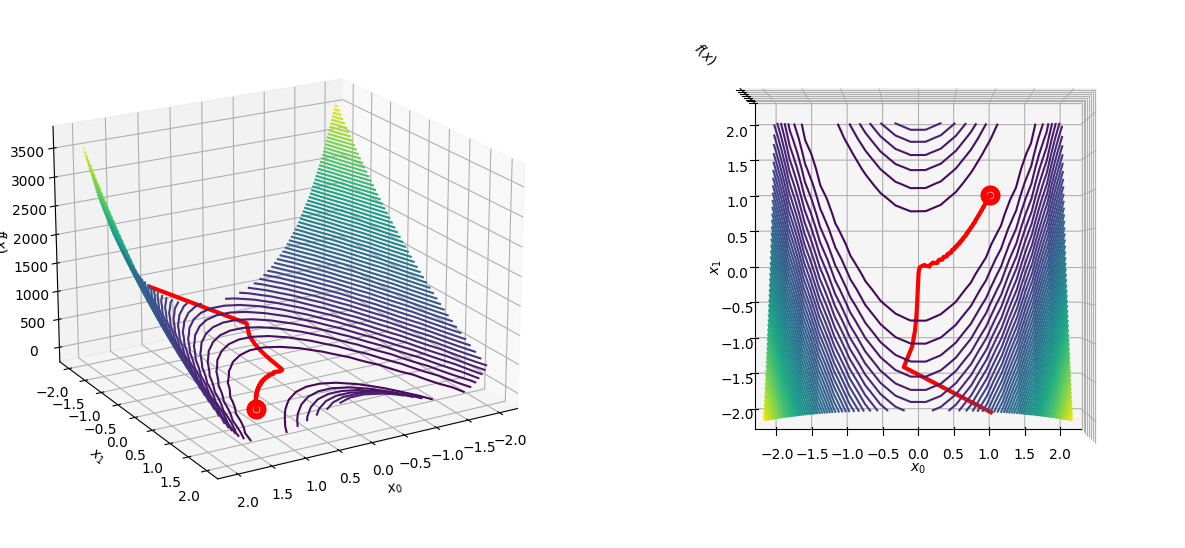

In [ ]:


x0 = np.array([1, -2])
x, k, points = SteepestVisualization(x0, rosembrock, grad_rosembrock, tol = 1e-5, iter = 10000)

X_estimate, Y_estimate = points[:, 0], points[:, 1] 
Z_estimate = rosembrock(np.array([X_estimate, Y_estimate]))

print("Num de iteraciones: ", k)

X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
Z = rosembrock(np.array([X, Y]))
min_z = rosembrock(np.stack([1, 1]))

fig = plt.figure(figsize=(15, 20))

#Primer Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(1, 1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(20, 60 )


#Segundo Plot 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(1, 1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90);


BRANIN

Num de iteraciones:  41


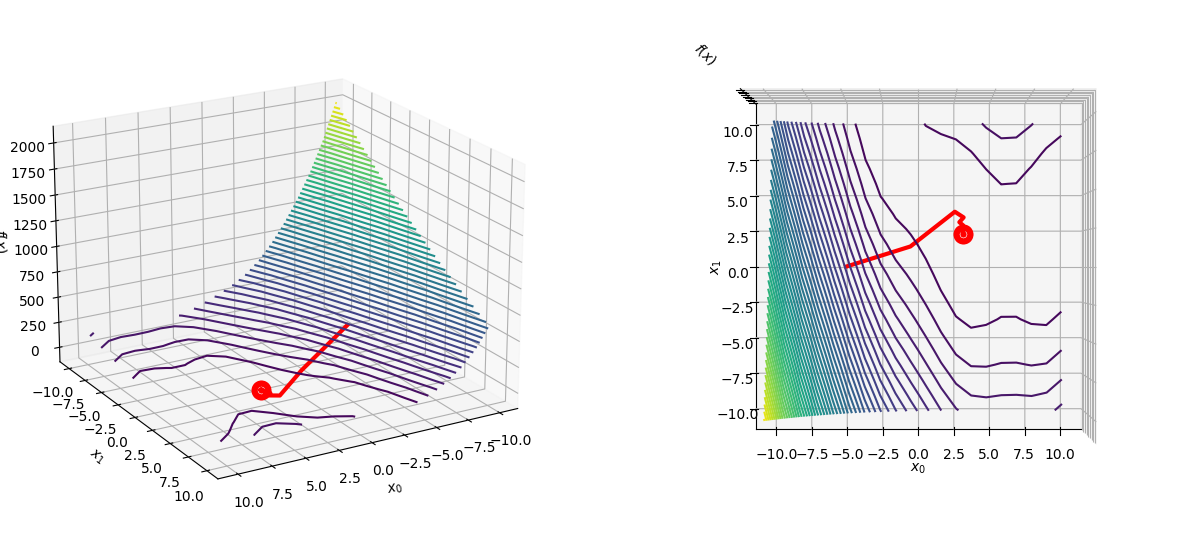

In [ ]:


x0 = np.array([-5, 0])
x, k, points = SteepestVisualization(x0, branin, grad_branin, tol = 1e-5, iter = 10000)

X_estimate, Y_estimate = points[:, 0], points[:, 1] 
Z_estimate = branin(np.array([X_estimate, Y_estimate]))

print("Num de iteraciones: ", k)

X, Y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
Z = branin(np.array([X, Y]))
min_z = branin(np.stack([np.pi, 2.275]))

fig = plt.figure(figsize=(15, 20))

#Primer Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(np.pi, 2.275, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(20, 60 )


#Segundo Plot 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(np.pi, 2.275, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90);
